In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [ ]:
sns.countplot()

In [22]:
dataset = pd.read_csv("Datasets/creditcard data.csv")
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,92345.0,1.724254,0.054124,0.625215,4.308400,-0.532295,0.540379,-0.688445,0.156967,1.476695,...,-0.367098,-0.771443,0.364177,-0.100579,-0.547578,-0.348022,-0.011480,-0.023193,62.91,0
149996,92346.0,-3.538487,2.921360,-1.298732,-1.035773,-0.030572,-0.441956,0.631323,0.445681,2.495754,...,-0.703023,-0.851606,-0.214636,-1.054619,0.305106,0.132541,-1.261532,-1.029257,37.91,0
149997,92347.0,-0.019481,1.224302,-0.132075,-0.678606,1.768679,-0.283992,1.579740,-0.978318,1.874612,...,-0.036681,1.134522,-0.311552,0.051861,-0.616234,-0.329780,0.220292,-0.232384,3.98,0
149998,92348.0,-0.511063,1.277683,-0.174698,-0.101018,0.970555,-1.040956,1.563977,-1.449619,0.595721,...,0.836970,0.470593,-0.314103,0.066781,0.363133,-0.073593,0.183600,0.121156,74.77,0


In [23]:
shape = dataset.shape
shape

(150000, 31)

In [24]:
sumofnull = dataset.isnull().sum()
sumofnull

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [25]:
dataset.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
149996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
149997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
149998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
def data_decribe():
    #get summary statistics for the dataset
    data = None
    return data

In [27]:
dataset.describe(include="all")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,54194.355033,-0.242705,0.038023,0.629991,0.128788,-0.252737,0.072127,-0.104194,0.058113,-0.068485,...,-0.037754,-0.113826,-0.029822,0.012224,0.121314,0.022162,0.002087,0.002729,89.239905,0.001953
std,21982.217623,1.819026,1.610616,1.288432,1.339578,1.310729,1.287130,1.163326,1.232369,1.098906,...,0.726939,0.642490,0.585633,0.595920,0.443855,0.491818,0.389262,0.312730,243.201330,0.044153
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-22.565679,-11.710896,0.000000,0.000000
25%,38983.000000,-1.024282,-0.546727,0.126353,-0.727564,-0.885587,-0.672444,-0.598057,-0.137951,-0.701064,...,-0.228588,-0.552384,-0.170877,-0.326083,-0.150980,-0.326355,-0.061292,-0.006881,5.750000,0.000000
50%,55851.500000,-0.268751,0.116952,0.722469,0.153668,-0.291903,-0.186156,-0.053039,0.076328,-0.137645,...,-0.059811,-0.092626,-0.042885,0.067137,0.159102,-0.060971,0.011904,0.023307,22.800000,0.000000
75%,72675.000000,1.160957,0.799711,1.346568,0.978876,0.274528,0.459228,0.426955,0.373243,0.515141,...,0.115703,0.311338,0.086679,0.410448,0.415016,0.285652,0.089682,0.078050,79.502500,0.000000
max,92348.000000,2.401777,18.902453,9.382558,16.715537,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [28]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,92345.0,1.724254,0.054124,0.625215,4.308400,-0.532295,0.540379,-0.688445,0.156967,1.476695,...,-0.367098,-0.771443,0.364177,-0.100579,-0.547578,-0.348022,-0.011480,-0.023193,62.91,0
149996,92346.0,-3.538487,2.921360,-1.298732,-1.035773,-0.030572,-0.441956,0.631323,0.445681,2.495754,...,-0.703023,-0.851606,-0.214636,-1.054619,0.305106,0.132541,-1.261532,-1.029257,37.91,0
149997,92347.0,-0.019481,1.224302,-0.132075,-0.678606,1.768679,-0.283992,1.579740,-0.978318,1.874612,...,-0.036681,1.134522,-0.311552,0.051861,-0.616234,-0.329780,0.220292,-0.232384,3.98,0
149998,92348.0,-0.511063,1.277683,-0.174698,-0.101018,0.970555,-1.040956,1.563977,-1.449619,0.595721,...,0.836970,0.470593,-0.314103,0.066781,0.363133,-0.073593,0.183600,0.121156,74.77,0


In [29]:
dataset.value_counts(subset="Class")

Class
0    149707
1       293
Name: count, dtype: int64

In [30]:
df = dataset.drop("Class",axis=1,inplace=False)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,92345.0,1.724254,0.054124,0.625215,4.308400,-0.532295,0.540379,-0.688445,0.156967,1.476695,...,-0.280992,-0.367098,-0.771443,0.364177,-0.100579,-0.547578,-0.348022,-0.011480,-0.023193,62.91
149996,92346.0,-3.538487,2.921360,-1.298732,-1.035773,-0.030572,-0.441956,0.631323,0.445681,2.495754,...,0.510437,-0.703023,-0.851606,-0.214636,-1.054619,0.305106,0.132541,-1.261532,-1.029257,37.91
149997,92347.0,-0.019481,1.224302,-0.132075,-0.678606,1.768679,-0.283992,1.579740,-0.978318,1.874612,...,0.552350,-0.036681,1.134522,-0.311552,0.051861,-0.616234,-0.329780,0.220292,-0.232384,3.98
149998,92348.0,-0.511063,1.277683,-0.174698,-0.101018,0.970555,-1.040956,1.563977,-1.449619,0.595721,...,-0.279702,0.836970,0.470593,-0.314103,0.066781,0.363133,-0.073593,0.183600,0.121156,74.77


In [31]:
numeric_features = dataset.drop("Class",axis=1,inplace=False)

In [32]:
corr_data = numeric_features.corr(numeric_only=True)
corr_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.000000,0.006656,0.022194,-0.075358,-0.042244,0.011597,-0.025394,0.013613,0.007408,-0.141184,...,-0.004923,-0.007037,0.001275,0.017877,0.004650,-0.034363,-0.010951,-0.003118,0.000323,-0.018123
V1,0.006656,1.000000,-0.006033,0.179315,-0.036230,0.005299,0.050058,0.077346,-0.012561,-0.053262,...,-0.057905,-0.020244,-0.052403,-0.088562,-0.015211,0.185394,0.007356,-0.006097,0.129306,-0.232982
V2,0.022194,-0.006033,1.000000,-0.101347,0.027003,-0.034952,0.013131,-0.008456,0.002292,0.009117,...,-0.063931,-0.022088,-0.023184,0.021236,-0.018814,-0.091506,-0.027361,0.007041,0.010671,-0.542549
V3,-0.075358,0.179315,-0.101347,1.000000,-0.048037,0.133239,-0.070247,0.162791,-0.094752,0.070776,...,-0.092695,0.036390,0.223425,0.020538,0.024268,-0.170932,0.029804,-0.051094,0.020482,-0.213789
V4,-0.042244,-0.036230,0.027003,-0.048037,1.000000,0.005523,-0.030612,-0.009536,0.026762,0.022481,...,0.008864,0.024969,0.041580,-0.003787,-0.003993,-0.006017,-0.026363,0.021427,-0.000379,0.094578
V5,0.011597,0.005299,-0.034952,0.133239,0.005523,1.000000,0.062083,-0.015665,-0.017799,0.026702,...,-0.036066,-0.042225,-0.085262,0.009377,-0.014861,-0.024355,-0.042388,-0.007560,-0.009759,-0.389755
V6,-0.025394,0.050058,0.013131,-0.070247,-0.030612,0.062083,1.000000,0.013420,-0.040208,0.030748,...,0.036358,0.009563,0.046673,-0.017835,-0.004497,0.045861,0.009374,-0.017653,-0.004904,0.199186
V7,0.013613,0.077346,-0.008456,0.162791,-0.009536,-0.015665,0.013420,1.000000,0.028672,0.036734,...,0.054619,0.012391,-0.050383,0.050761,0.000665,-0.097200,-0.024763,-0.080378,-0.041279,0.366734
V8,0.007408,-0.012561,0.002292,-0.094752,0.026762,-0.017799,-0.040208,0.028672,1.000000,-0.005999,...,-0.034319,0.036929,0.019039,-0.029026,0.010800,0.016892,0.012031,0.014820,0.013477,-0.087064
V9,-0.141184,-0.053262,0.009117,0.070776,0.022481,0.026702,0.030748,0.036734,-0.005999,1.000000,...,0.033356,0.012624,0.050931,-0.043694,0.013908,0.116532,0.080862,-0.011700,-0.030089,-0.026876


<Axes: >

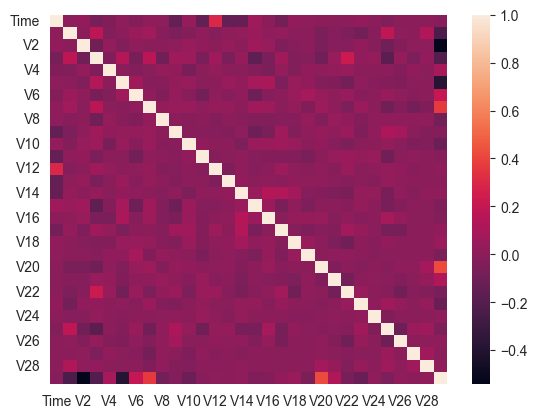

In [33]:
g = sns.heatmap(corr_data)
g

In [34]:
g

<Axes: >

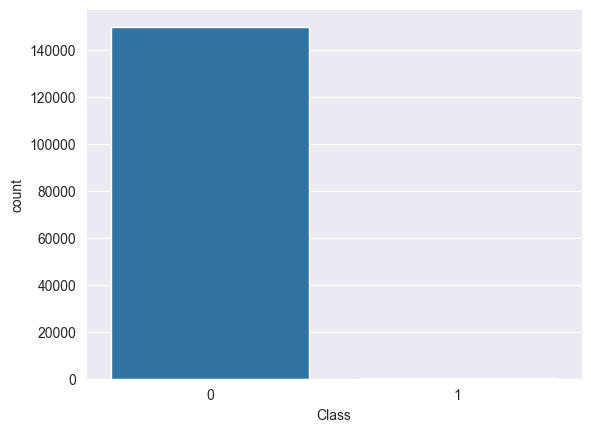

In [35]:
ax = sns.countplot(dataset,x="Class")

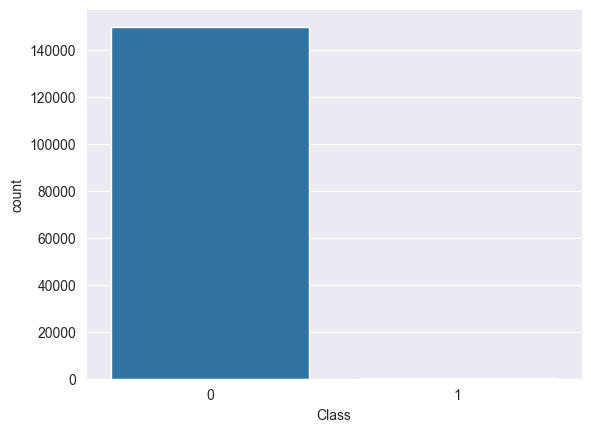

In [36]:
ax.get_figure()

In [37]:
from sklearn.preprocessing import StandardScaler

In [42]:
sc = StandardScaler()
arr = np.array(dataset["Amount"])
arr = arr.reshape(-1,1)
scaled = sc.fit(arr)
data_1 = dataset.drop(["Amount","Class"],axis=1,inplace=False)
data_1["Amount"] = scaled.transform(arr)
data_1["Class"] = dataset["Class"]
data_1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.248273,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.355879,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.190047,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140872,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.079152,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,92345.0,1.724254,0.054124,0.625215,4.308400,-0.532295,0.540379,-0.688445,0.156967,1.476695,...,-0.367098,-0.771443,0.364177,-0.100579,-0.547578,-0.348022,-0.011480,-0.023193,-0.108264,0
149996,92346.0,-3.538487,2.921360,-1.298732,-1.035773,-0.030572,-0.441956,0.631323,0.445681,2.495754,...,-0.703023,-0.851606,-0.214636,-1.054619,0.305106,0.132541,-1.261532,-1.029257,-0.211060,0
149997,92347.0,-0.019481,1.224302,-0.132075,-0.678606,1.768679,-0.283992,1.579740,-0.978318,1.874612,...,-0.036681,1.134522,-0.311552,0.051861,-0.616234,-0.329780,0.220292,-0.232384,-0.350575,0
149998,92348.0,-0.511063,1.277683,-0.174698,-0.101018,0.970555,-1.040956,1.563977,-1.449619,0.595721,...,0.836970,0.470593,-0.314103,0.066781,0.363133,-0.073593,0.183600,0.121156,-0.059498,0


In [43]:
np.array(dataset["Amount"])

array([149.62,   2.69, 378.66, ...,   3.98,  74.77,  16.94])

In [44]:
arr.reshape(-1,1)

array([[149.62],
       [  2.69],
       [378.66],
       ...,
       [  3.98],
       [ 74.77],
       [ 16.94]])

In [45]:
data_1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.248273,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.355879,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.190047,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140872,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.079152,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,92345.0,1.724254,0.054124,0.625215,4.308400,-0.532295,0.540379,-0.688445,0.156967,1.476695,...,-0.367098,-0.771443,0.364177,-0.100579,-0.547578,-0.348022,-0.011480,-0.023193,-0.108264,0
149996,92346.0,-3.538487,2.921360,-1.298732,-1.035773,-0.030572,-0.441956,0.631323,0.445681,2.495754,...,-0.703023,-0.851606,-0.214636,-1.054619,0.305106,0.132541,-1.261532,-1.029257,-0.211060,0
149997,92347.0,-0.019481,1.224302,-0.132075,-0.678606,1.768679,-0.283992,1.579740,-0.978318,1.874612,...,-0.036681,1.134522,-0.311552,0.051861,-0.616234,-0.329780,0.220292,-0.232384,-0.350575,0
149998,92348.0,-0.511063,1.277683,-0.174698,-0.101018,0.970555,-1.040956,1.563977,-1.449619,0.595721,...,0.836970,0.470593,-0.314103,0.066781,0.363133,-0.073593,0.183600,0.121156,-0.059498,0


In [46]:
data = data_1.drop("Time",axis=1,inplace=False)
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.248273,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.355879,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.190047,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140872,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.079152,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.724254,0.054124,0.625215,4.308400,-0.532295,0.540379,-0.688445,0.156967,1.476695,0.839266,...,-0.367098,-0.771443,0.364177,-0.100579,-0.547578,-0.348022,-0.011480,-0.023193,-0.108264,0
149996,-3.538487,2.921360,-1.298732,-1.035773,-0.030572,-0.441956,0.631323,0.445681,2.495754,1.441756,...,-0.703023,-0.851606,-0.214636,-1.054619,0.305106,0.132541,-1.261532,-1.029257,-0.211060,0
149997,-0.019481,1.224302,-0.132075,-0.678606,1.768679,-0.283992,1.579740,-0.978318,1.874612,0.551191,...,-0.036681,1.134522,-0.311552,0.051861,-0.616234,-0.329780,0.220292,-0.232384,-0.350575,0
149998,-0.511063,1.277683,-0.174698,-0.101018,0.970555,-1.040956,1.563977,-1.449619,0.595721,-1.037676,...,0.836970,0.470593,-0.314103,0.066781,0.363133,-0.073593,0.183600,0.121156,-0.059498,0


In [55]:
data_2 = data.drop_duplicates(ignore_index=True,inplace=False)
data_2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.248273,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.355879,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.190047,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140872,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.079152,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145361,1.724254,0.054124,0.625215,4.308400,-0.532295,0.540379,-0.688445,0.156967,1.476695,0.839266,...,-0.367098,-0.771443,0.364177,-0.100579,-0.547578,-0.348022,-0.011480,-0.023193,-0.108264,0
145362,-3.538487,2.921360,-1.298732,-1.035773,-0.030572,-0.441956,0.631323,0.445681,2.495754,1.441756,...,-0.703023,-0.851606,-0.214636,-1.054619,0.305106,0.132541,-1.261532,-1.029257,-0.211060,0
145363,-0.019481,1.224302,-0.132075,-0.678606,1.768679,-0.283992,1.579740,-0.978318,1.874612,0.551191,...,-0.036681,1.134522,-0.311552,0.051861,-0.616234,-0.329780,0.220292,-0.232384,-0.350575,0
145364,-0.511063,1.277683,-0.174698,-0.101018,0.970555,-1.040956,1.563977,-1.449619,0.595721,-1.037676,...,0.836970,0.470593,-0.314103,0.066781,0.363133,-0.073593,0.183600,0.121156,-0.059498,0


In [65]:
data_3 = data.duplicated()
df = data[data_3==False]
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.248273,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.355879,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.190047,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140872,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.079152,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.724254,0.054124,0.625215,4.308400,-0.532295,0.540379,-0.688445,0.156967,1.476695,0.839266,...,-0.367098,-0.771443,0.364177,-0.100579,-0.547578,-0.348022,-0.011480,-0.023193,-0.108264,0
149996,-3.538487,2.921360,-1.298732,-1.035773,-0.030572,-0.441956,0.631323,0.445681,2.495754,1.441756,...,-0.703023,-0.851606,-0.214636,-1.054619,0.305106,0.132541,-1.261532,-1.029257,-0.211060,0
149997,-0.019481,1.224302,-0.132075,-0.678606,1.768679,-0.283992,1.579740,-0.978318,1.874612,0.551191,...,-0.036681,1.134522,-0.311552,0.051861,-0.616234,-0.329780,0.220292,-0.232384,-0.350575,0
149998,-0.511063,1.277683,-0.174698,-0.101018,0.970555,-1.040956,1.563977,-1.449619,0.595721,-1.037676,...,0.836970,0.470593,-0.314103,0.066781,0.363133,-0.073593,0.183600,0.121156,-0.059498,0


In [66]:
x = df.drop("Class",axis=1,inplace=False)
y = df["Class"]

In [67]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 5.0 MB/s eta 0:00:00a 0:00:01


In [68]:
from imblearn.over_sampling import SMOTE

In [69]:
equalize = SMOTE(random_state=42)
X_res, y_res = equalize.fit_resample(x, y)

In [70]:
X_res

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.248273
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.355879
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.190047
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140872
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.079152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290159,-1.361993,2.036155,-1.851181,1.554795,-0.033180,-1.296158,-1.527498,0.893255,-1.501623,-4.249672,...,0.152206,0.337566,-0.329322,-0.245957,-0.349729,0.236940,-0.479991,0.468909,0.238616,-0.362828
290160,-0.179696,1.071853,1.734895,1.999093,0.142694,-0.117491,0.212393,0.065536,0.632278,-0.244126,...,-0.332427,0.050998,0.333565,-0.029200,0.292274,-0.235377,-0.133320,-0.079687,0.042119,-0.350887
290161,-0.434271,0.989120,0.650739,0.328725,0.619721,-1.342171,1.076315,-0.160125,-0.499607,-1.034409,...,-0.116602,-0.016959,-0.208811,-0.163140,0.255071,0.446988,-0.503921,-0.038818,-0.004942,-0.243809
290162,0.609119,-0.191887,1.245800,-0.522508,-0.647819,0.219102,-0.468083,0.159915,1.150200,-0.825800,...,0.035741,0.061074,0.495744,-0.273894,-0.216600,0.379411,0.518718,0.033481,0.012589,-0.287749


In [71]:
y_res

0         0
1         0
2         0
3         0
4         0
         ..
290159    1
290160    1
290161    1
290162    1
290163    1
Name: Class, Length: 290164, dtype: int64

In [73]:
y_res.sum()*2

290164

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [79]:
x_train, x_test, y_train, y_test = train_test_split(X_res,y_res,random_state=4,train_size=0.8,test_size=0.2)

In [80]:
x_train, x_test, y_train, y_test = train_test_split(X_res,y_res,random_state=4,train_size=0.8,test_size=0.2)
regr = GaussianNB()
model = regr.fit(x_train, y_train)
y_predict = model.predict(x_test)
accuracy = accuracy_score(y_test,y_predict)
cm = confusion_matrix(y_test,y_predict)
cr = classification_report(y_test,y_predict)

In [87]:
len(x_train.columns)

29

In [83]:
29115+28918

58033

In [84]:
cm

array([[28432,   683],
       [ 4292, 24626]])

In [88]:
d = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]

In [90]:
len(d[0])

29